In [127]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from scipy.optimize import * 
from sklearn import svm
import pylab as pl
import numpy as np
import json
import math

In [128]:
def sigmoid(x):
    # Computes the logistic sigmoid function
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

def cost_function(theta, x, y):
    # Computes the cost function for all the training samples
    epsilon = 0.0000001
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x) + epsilon) + (1 - y) * np.log(
            1 - probability(theta, x) + epsilon)) # we add a very small positive number "epsilon" to each log term to ensure that the input to this log is not zero. 
    return total_cost

def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

def fit(x, y, theta):
    opt_weights = fmin_tnc(func=cost_function, x0=theta,
                  fprime=gradient,args=(x, y.flatten()))
    return opt_weights[0]


<h2>The following block shows how to train and visualize a logistic regression model based on a training set</h2>

X: [1, 'GPA', 'No. hrs/wk', 'GPA' * 'No. hrs/wk', 'GPA'^2, 'No. hrs/wk'^2]
 [[  1.     3.6    6.    21.6   12.96  36.  ]
 [  1.     3.5    8.    28.    12.25  64.  ]
 [  1.     3.    12.    36.     9.   144.  ]
 [  1.     3.1   11.    34.1    9.61 121.  ]
 [  1.     3.2   10.    32.    10.24 100.  ]
 [  1.     4.     5.    20.    16.    25.  ]
 [  1.     2.8    8.    22.4    7.84  64.  ]
 [  1.     2.5   12.    30.     6.25 144.  ]
 [  1.     2.5   10.    25.     6.25 100.  ]
 [  1.     1.2   25.    30.     1.44 625.  ]
 [  1.     1.3   20.    26.     1.69 400.  ]
 [  1.     2.    23.    46.     4.   529.  ]
 [  1.     3.1    2.     6.2    9.61   4.  ]
 [  1.     3.2    4.    12.8   10.24  16.  ]
 [  1.     3.3    4.    13.2   10.89  16.  ]
 [  1.     3.5    3.    10.5   12.25   9.  ]]

y: [Binary Grade]
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

The estimated parameters: beta =  [-13.98713669 -18.92517176 -16.98714633  14.7876347

  NIT   NF   F                       GTG
    0    1  6.931469805599654E-01   6.38906444E+02
tnc: fscale = 0.0395623
    1    6  1.458849426638431E-01   1.81051396E+01
    2    9  1.201918557239061E-01   2.98501200E+00
    3   14  1.157582537361540E-01   2.65627889E-01
tnc: fscale = 1.94027
    4   18  2.189241491098811E-02   1.65098961E-03
    5   25  3.781357424425202E-04   7.39275203E-03
tnc: stepmx = 1000
    6   30  8.789916940227872E-05   7.50365749E-05
tnc: fscale = 115.442
    7   35  1.941197998411712E-05   5.51113309E-08
tnc: fscale = 4259.71
    8   41  5.980761030851786E-07   2.46021825E-11
tnc: fscale = 201611
    9   49  3.691720148568942E-07   3.36115189E-11
   10   54 -9.823038242290635E-08   5.53948309E-17
tnc: |pg| = 3.69166e-14 -> local minimum
   10   54 -9.823038242290635E-08   5.53948309E-17
tnc: Local minima reach (|pg| ~= 0)


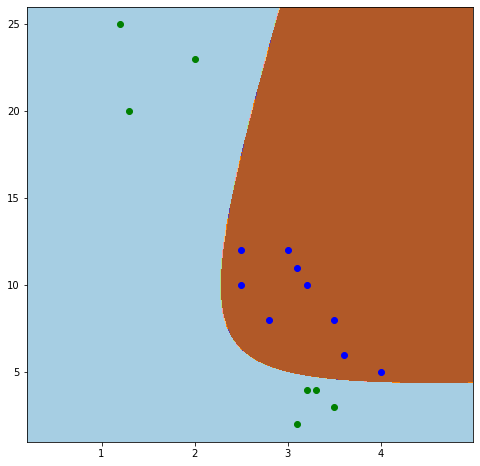

In [129]:
def add_features(X):
    a = add_X1byX2(X)
    a = addX1Sqr(a)
    a = addX2Sqr(a)
    return a

def add_X1byX2(X):
    new_feat = np.multiply(X[:,1], X[:,2])
    new_feat = new_feat.reshape(len(X[:,1]), 1)
    X = np.append(X, new_feat, axis=1)
    return X
    
def addX1Sqr(X):
    new_feat = np.multiply(X[:,1], X[:,1])
    new_feat = new_feat.reshape(len(X[:,1]), 1)
    X = np.append(X, new_feat, axis=1)
    return X
    
def addX2Sqr(X):
    new_feat = np.multiply(X[:,2], X[:,2])
    new_feat = new_feat.reshape(len(X[:,1]), 1)
    X = np.append(X, new_feat, axis=1)
    return X

def predict(X, beta):
    y = np.matmul(X, beta.reshape(6, 1))
    y[y<0] = 0
    y[y>0] = 1
    return y

X_success  = np.array([[1, 3.6, 6], [1, 3.5, 8], [1, 3.0, 12], [1, 3.1, 11], [1, 3.2, 10], [1, 4, 5], [1, 2.8, 8], [1, 2.5, 12], [1, 2.5, 10]])
y_success  = np.ones((X_success.shape[0], 1))
X_failue   = np.array([[1, 1.2, 25], [1, 1.3, 20], [1, 2.0, 23], [1, 3.1, 2], [1, 3.2, 4], [1, 3.3, 4], [1, 3.5, 3]])
y_failue   = np.zeros((X_failue.shape[0], 1))
X          = np.concatenate((X_success, X_failue), axis=0)
y          = np.concatenate((y_success, y_failue), axis=0)   

X = add_features(X)

beta_init  = np.zeros((X.shape[1], 1))

print("X: [1, 'GPA', 'No. hrs/wk', 'GPA' * 'No. hrs/wk', 'GPA'^2, 'No. hrs/wk'^2]\n", X)
print("\ny: [Binary Grade]\n", y)

# Estimate the weight parameters (beta) based on the feature matrix X and the label vector y
beta      = fit(X, y, beta_init)
print("\nThe estimated parameters: beta = ", beta, "\n")
print("beta", beta.shape)

h = .01  # step size in the mesh

# create a mesh to plot in
x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x2_min, x2_max = X[:, 2].min() - 1, X[:, 2].max() + 1

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

XX = np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel()] # the first column is a column of all 1s, the second column is x_1 and the third column is x_2. 
XX = add_features(XX)
yy = predict(XX, beta)
yy = yy.reshape(xx1.shape)

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
plt.set_cmap(pl.cm.Paired)
plt.contourf(xx1, xx2, yy)
plt.scatter(X_success[:,1], X_success[:,2], marker = "o", color = "b")
plt.scatter(X_failue[:,1], X_failue[:,2], marker = "o", color = "g")
plt.show()


<h2>The following block plots the testing points and based on which side each testing point is located, we can easily predict its class label. </h2>


Predicted truth probabilities of the six testing examples: 
['1.00', '0.00', '1.00', '1.00', '1.00', '0.00']




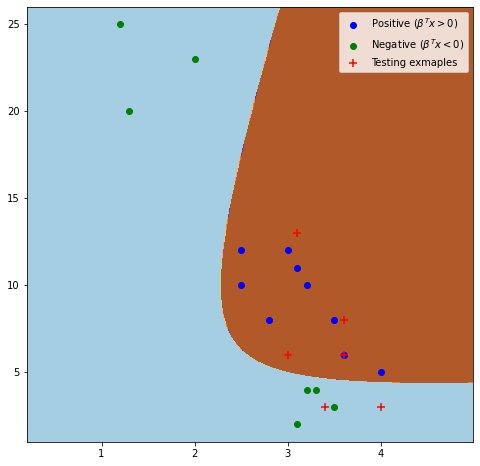

In [131]:
def sigmoid(x):
    sig = 1 / (1 + math.exp(-1 * x))
    return sig

X_test  = np.array([[1, 3.6, 8], [1, 3.4, 3], [1, 3.0, 6], [1, 3.1, 13], [1, 3.6, 6], [1, 4, 3]])

X_test = add_features(X_test)

y_truth_probability = [sigmoid(a) for a in np.dot(X_test, beta)]
s = ["{0:.2f}".format(a) for a in y_truth_probability]
print("\nPredicted truth probabilities of the six testing examples: \n{}\n\n".format(s))

h = .01  # step size in the mesh
# create a mesh to plot in
x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x2_min, x2_max = X[:, 2].min() - 1, X[:, 2].max() + 1

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))


XX = np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel()] # the first column is a column of all 1s, the second column is x_1 and the third column is x_2. 
XX = add_features(XX)
yy = predict(XX, beta)
yy = yy.reshape(xx1.shape)

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
plt.set_cmap(pl.cm.Paired)
plt.contourf(xx1, xx2, yy)
plt.scatter(X_success[:,1], X_success[:,2], marker = "o", color = "b", label=r'Positive ($\beta^T x > 0$)')
plt.scatter(X_failue[:,1], X_failue[:,2], marker = "o", color = "g", label=r'Negative ($\beta^T x < 0$)')
plt.scatter(X_test[:,1], X_test[:,2], s=70, c= 'r', marker = "+", label=r'Testing exmaples')   
plt.legend()
plt.show()